In [14]:
import os
#Read input images
print(os.listdir("/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images"))

['.DS_Store', 'yoga_train', 'yoga_test', 'yoga_val']


In [15]:
import glob
from PIL import Image
import numpy as np

SIZE = (256,256) #resize images
train_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_train/*'
val_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_val/*'
test_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_test/*'

def capture_into_list(data_dir):
    images = []
    labels = []
    for directory_path in glob.glob(data_dir):
        label = directory_path.split(os.path.sep)[-1]
        print(label)
        for img_path in glob.glob(os.path.join(directory_path, "*.png")):
            print(img_path)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(SIZE, Image.Resampling.BILINEAR)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [16]:
train_images, train_labels = capture_into_list(train_dir)

Garland Pose
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_train/Garland Pose/Garland Pose_64_0.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_train/Garland Pose/Garland Pose_21_0.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_train/Garland Pose/Garland Pose_4_1.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_train/Garland Pose/Garland Pose_40_1.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_train/Garland Pose/Garland Pose_23_2.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_train/Garland Pose/Garland Pose_66_2.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_train/Garland Pose/Garland Pose_38_1.png
/Users/harrynguyen/Documents/GitHub/

In [10]:
train_images.shape, train_labels.shape

((12916, 256, 256, 3), (12916,))

In [17]:
val_images, val_labels = capture_into_list(val_dir)
test_images, test_labels = capture_into_list(test_dir)

Two-Legged Inverted Staff Pose
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_val/Two-Legged Inverted Staff Pose/Two-Legged Inverted Staff Pose_29_2.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_val/Two-Legged Inverted Staff Pose/Two-Legged Inverted Staff Pose_32_1.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_val/Two-Legged Inverted Staff Pose/Two-Legged Inverted Staff Pose_14_2.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_val/Two-Legged Inverted Staff Pose/Two-Legged Inverted Staff Pose_51_2.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_val/Two-Legged Inverted Staff Pose/Two-Legged Inverted Staff Pose_49_original.png
/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images/yoga_val/Two-Legged In

In [18]:
val_images.shape, val_labels.shape

((2760, 256, 256, 3), (2760,))

In [19]:
test_images.shape, test_labels.shape

((3212, 256, 256, 3), (3212,))

In [20]:
#Encode label from text to integer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(val_labels)
val_labels_encoded = le.transform(val_labels)
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [68]:
print("Original train labels:", train_labels[:-5])
print("Encoded train labels:", train_labels_encoded[:-5])

print("Original validation labels:", val_labels[:-5])
print("Encoded validation labels:", val_labels_encoded[:-5])

print("Original test labels:", test_labels[:-5])
print("Encoded test labels:", test_labels_encoded[:-5])


Original train labels: ['Garland Pose' 'Garland Pose' 'Garland Pose' ... 'Pigeon Pose'
 'Pigeon Pose' 'Pigeon Pose']
Encoded train labels: [20 20 20 ... 36 36 36]
Original validation labels: ['Two-Legged Inverted Staff Pose' 'Two-Legged Inverted Staff Pose'
 'Two-Legged Inverted Staff Pose' ... 'Embryo Pose' 'Embryo Pose'
 'Embryo Pose']
Encoded validation labels: [12 12 12 ...  4  4  4]
Original test labels: ['Wide-Legged Forward Bend' 'Wide-Legged Forward Bend'
 'Wide-Legged Forward Bend' ... 'Handstand' 'Handstand' 'Handstand']
Encoded test labels: [11 11 11 ...  7  7  7]


In [22]:
x_train, y_train, x_val, y_val, x_test, y_test = train_images, train_labels_encoded, val_images, val_labels_encoded, test_images, test_labels_encoded

#scale the pixels value to between 0 and 1
x_train, x_val, x_test = x_train/255.0, x_val/255.0, x_test/255.0

In [23]:
print(x_train.mean())#the mean now should be 256 times less than

0.008437574818988262


In [18]:
#one hot encode y values for NN
from sklearn.preprocessing import OneHotEncoder

#initialize
one_hot_encoder = OneHotEncoder(sparse_output=False)

y_train_one_hot = one_hot_encoder.fit_transform(train_labels_encoded.reshape(-1,1))
y_val_one_hot = one_hot_encoder.transform(val_labels_encoded.reshape(-1, 1))
y_test_one_hot = one_hot_encoder.transform(test_labels_encoded.reshape(-1, 1))

In [19]:
# Print shapes to verify
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"y_val_one_hot shape: {y_val_one_hot.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")

y_train_one_hot shape: (12916, 60)
y_val_one_hot shape: (2760, 60)
y_test_one_hot shape: (3212, 60)


In [20]:
print(f"y_train_one_hot last 5 values: {y_train_one_hot[:5]}")

y_train_one_hot last 5 values: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
########Build Pre-trained Model vgg16
SIZE = 256
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

In [25]:
VGG_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
for layer in VGG_model.layers:
    layer.trainable = False

VGG_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
def extract_features(model, data):
    features = model.predict(data)
    features = features.reshape(features.shape[0], -1)
    return features

### X_TRAIN_RF

In [29]:
x_train_RF = extract_features(VGG_model, x_train)

404/404 ━━━━━━━━━━━━━━━━━━━━ 6379s 16s/step


In [30]:
x_train_RF.shape

(12916, 32768)

In [31]:
print(x_train_RF[:-5])

[[0.1387448  0.         0.         ... 0.         0.6936425  0.        ]
 [0.05919549 0.         0.         ... 0.         0.6846705  0.        ]
 [0.08553793 0.         0.         ... 0.         0.6758144  0.        ]
 ...
 [0.05919549 0.         0.         ... 0.         0.6693889  0.        ]
 [0.05743022 0.         0.         ... 0.         0.6693889  0.        ]
 [0.0652291  0.         0.         ... 0.00510009 0.69891745 0.        ]]


In [32]:
# Check if TensorFlow is using the GPU
import tensorflow
print("Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


### X_VAL_RF

In [33]:
x_val_rf = extract_features(VGG_model, x_val)

87/87 ━━━━━━━━━━━━━━━━━━━━ 1150s 13s/step


In [34]:
x_val_rf.shape

(2760, 32768)

In [35]:
print(x_val_rf[:-5])

[[0.05919549 0.         0.         ... 0.         0.6693889  0.        ]
 [0.05919549 0.         0.         ... 0.         0.6693889  0.        ]
 [0.05912468 0.         0.         ... 0.         0.6699633  0.        ]
 ...
 [0.05919549 0.         0.         ... 0.         0.6866353  0.        ]
 [0.0581632  0.         0.         ... 0.         0.669389   0.        ]
 [0.05691767 0.         0.         ... 0.         0.67529935 0.        ]]


### X_TEST_RF

In [36]:
x_test_rf = extract_features(VGG_model, x_test)

101/101 ━━━━━━━━━━━━━━━━━━━━ 1329s 13s/step


In [37]:
x_test_rf.shape

(3212, 32768)

### SAVE FILES

In [39]:
# Save the extracted features to .npy files
np.save('x_train_RF.npy', x_train_RF)
np.save('x_val_RF.npy', x_val_rf)
np.save('x_test_RF.npy', x_test_rf)

# Save the encoded labels
np.save('y_train.npy', y_train)
np.save('y_val.npy', y_val)
np.save('y_test.npy', y_test)

In [38]:
print(x_test_rf[:-5])

[[0.05914751 0.         0.         ... 0.         0.6729823  0.        ]
 [0.05919549 0.         0.         ... 0.         0.6693889  0.        ]
 [0.05919549 0.         0.         ... 0.         0.65333724 0.        ]
 ...
 [0.05919549 0.         0.         ... 0.         0.6693889  0.        ]
 [0.05912687 0.         0.         ... 0.         0.6693889  0.        ]
 [0.05919549 0.         0.         ... 0.         0.6693889  0.        ]]


### Random Forest Train

In [40]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 100, random_state=42)

In [41]:
RF_model.fit(x_train_RF, y_train)

RandomForestClassifier(random_state=42)

In [42]:
train_prediction_RF = RF_model.predict(x_train_RF)

In [43]:
print(train_prediction_RF[:-5])

[20 20 20 ... 36 36 36]


In [45]:
train_prediction_RF.shape

(12916,)

In [77]:
from sklearn import metrics
print("Train Accuracy = ", metrics.accuracy_score(train_labels, train_prediction_RF))

Train Accuracy =  0.9026014245896562


In [69]:
le.fit(train_labels)
train_prediction_RF = le.inverse_transform(train_prediction_RF)

<Axes: >

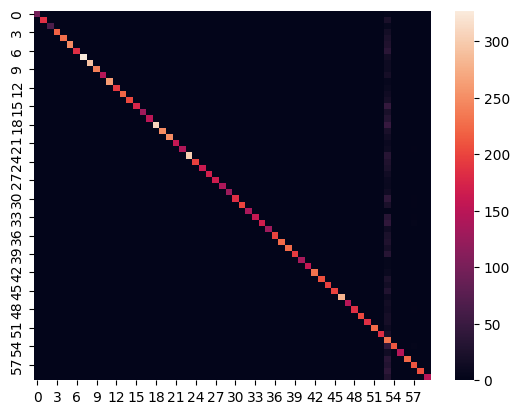

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_train = confusion_matrix(train_labels, train_prediction_RF)
sns.heatmap(cm_train, annot=False)

In [78]:
print(train_prediction_RF[:5])

['Garland Pose' 'Garland Pose' 'Garland Pose' 'Garland Pose'
 'Garland Pose']


In [71]:
val_prediction_RF = RF_model.predict(x_val_rf)

In [89]:
print(val_prediction_RF)

[ 5 53 11 ... 45 24 23]


In [88]:
le.fit(val_labels)
val_prediction_RF = le.inverse_transform(val_prediction_RF)

ValueError: y contains previously unseen labels: [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]

In [ ]:
print("Val Accuracy = ", metrics.accuracy_score(val_labels, val_prediction_RF))
cm_val = confusion_matrix(val_labels, val_prediction_RF)
sns.heatmap(cm_val, annot=False)

In [46]:
test_prediction_RF = RF_model.predict(x_test_rf)

In [51]:
test_prediction_RF = le.inverse_transform(test_prediction_RF)

ValueError: y contains previously unseen labels: [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]

In [50]:
print("Test Accuracy = ", metrics.accuracy_score(y_test, test_prediction_RF))

Test Accuracy =  0.033623910336239106


<Axes: >

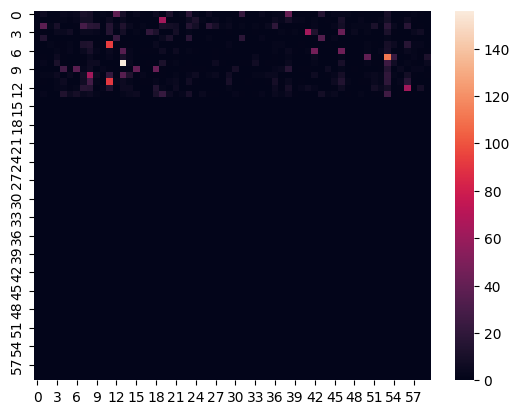

In [58]:
cm_test = confusion_matrix(y_test, test_prediction_RF)
sns.heatmap(cm_test, annot=False)

In [64]:
y_val.shape
print(y_val)

[12 12 12 ...  4  4  4]


In [67]:
val_prediction_RF.shape
print(val_prediction_RF)

[ 5 53 11 ... 45 24 23]


In [4]:
import sys
!{sys.executable} --version

Python 3.12.1


In [5]:
!{sys.executable} -m ensurepip --default-pip

Looking in links: /var/folders/9_/z_hkcvrx4150jhlxkgq00mv40000gn/T/tmpuf9t8y57


In [6]:
!{sys.executable} -m pip install --upgrade pip setuptools wheel

In [53]:
!{sys.executable} -m pip install seaborn

In [7]:
import pip
import setuptools
import distutils

In [8]:
import keras.api.applications.vgg16 as VGG

2024-08-06 21:12:04.991055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
from keras.api.applications.vgg16 import VGG16

In [90]:
yoga_labels = ['yoga_train', 'yoga_val', 'yoga_test']
yoga_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2'
for label in yoga_labels:
    os.makedirs(os.path.join(yoga_dir, label), exist_ok=True)

In [91]:
from importDataSet import prepare_datasets
train_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_train'
val_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_val'
test_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/images2/yoga_test'
data_dir = '/Users/harrynguyen/Documents/GitHub/APS360_Yoga_Poses_Classification/BaselineModel/skeletonized'

prepare_datasets(data_dir, train_dir, val_dir, test_dir)

Dataset preparation complete.


: 